## Python Imports
import random->it is a built-in 'random' module in python which helps to generate random number and sequences.


In [ ]:
# Built-in Imports
import random

## Python Imports
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

These are python libraries used for data analysis and visualization.

1. NumPy->Used in computing and data analysis, as it allows for efficient numerical operations on large dataset.

2. Pandas-> It provides data structures for efficiently storing and manipulating tabular data and tools for working with these data structures.It is mainly used in data analysis and data science workflows. 

3. Matplotlib->It Provides a tool for creating plots and charts like (line plots, scatter plots, histograms).It is used in data visualization and data exploration workflows.




from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

This helps to import three functions from sklern.metrics.

1. 'classification_report'->it helps to generate a report which showes the precision, recall,f1-score and also helps for each task in classifiction task.

2. 'confusion_matrix'->it shows the number of true positives,false positive, true negatives, and false negatives for each class in a classification task.

3. 'confusionMatrixDisplay'->it helps to create visual representation of a confusion matrix using a matplotlib plot

In [ ]:
# Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

##Keras Imports 
1. 'layers'->It provides various types of layers which can be used to build neural networks in keras.

2. 'Model1'->It allows to create a keras model by specifying input and output of the network with layer in between .

3. 'SGD'-> It is commonly used to train neural networks.
4. 'get_file':It helps to download a file from a specified URL and it also saves to the local directory. we will use to download pre-trained models or dataset.
5. 'to_categorical'->it helps in convertion of class labels to one-hot encoded vector, which are used as the target output for neural networks.
6. 'ImageDatGenerator'->it helps to load and preprocess image data in keras.it also includes some techniques like rotation, scaling, and flipping.


In [ ]:
# Keras Imports
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import get_file, to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Dataset Downloader
This section will download the selected [MedMNIST](https://medmnist.github.io/) dataset as a NumPy array object to your Google Colab instance. 

Here I am downloading PneumoniaMNIST data set, which is a Binary-class(where examples are  one or maximum two classes Labels) with 5,856 samples.



In [ ]:
DATA_NAME = "PneumoniaMNIST"

1.Here "!wget"-> Is used to download info.py from MedMNIST.

2."from info import INFO"-> Is used to import dictionary object "INFO" from info.py

3."data=INFO[DATA_NAME.LOWER()]"-> here we will assign the value of the key DATA_NAME in dictionary "INFO" to a variable data. we are also using ".lower()" method to get the string in lower case.


In [ ]:
!wget https://raw.githubusercontent.com/MedMNIST/MedMNIST/main/medmnist/info.py
from info import INFO
data = INFO[DATA_NAME.lower()]

--2023-04-11 08:12:09--  https://raw.githubusercontent.com/MedMNIST/MedMNIST/main/medmnist/info.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22841 (22K) [text/plain]
Saving to: ‘info.py’

info.py             100%[===================>]  22.31K  --.-KB/s    in 0.001s  

2023-04-11 08:12:09 (16.5 MB/s) - ‘info.py’ saved [22841/22841]



This code is used to download a dataset from a specified URL and it also helps to save it to a local file path

In [ ]:
# Downloads the dataset file hosted on Zenodo.
file_path = get_file(fname="dataset.npz", 
                     origin=data["url"], 
                     md5_hash=data["MD5"])

4170669/4170669 [==============================] - 8s 2us/step


This code is used to load and extract the training, validation, and testing images and their corresponding lables from a NumPY object.

In [ ]:
# Loads the downloaded NumPy object.
dataset = np.load(file_path)

# Gets the training images and labels from the NumPy object.
train_x = dataset["train_images"]
train_y = dataset["train_labels"]

# Gets the validation images and labels from the NumPy object.
val_x = dataset["val_images"]
val_y = dataset["val_labels"]

# Gets the testing images and labels from the NumPy object.
test_x = dataset["test_images"]
test_y = dataset["test_labels"]

## Data Exploration
In this section we will declare a list of lables for a dataset and gets a counts of each label in three different datasets:
1. train.
2. validation. 
3. test sets.

In [ ]:
# Declares a list of labels.
labels = list(data["label"].values()) + ["total"]

# Gets the counts for each label in each of our datasets.
_, train_counts = np.unique(train_y, return_counts=True)
_, val_counts = np.unique(val_y, return_counts=True)
_, test_counts = np.unique(test_y, return_counts=True)

# Prints the counts for each label from each dataset.
print(pd.DataFrame(list(zip(np.append(train_counts, [sum(train_counts)]), 
                            np.append(val_counts, [sum(val_counts)]), 
                            np.append(test_counts, [sum(test_counts)]))), 
                   index=labels, columns=["Train", "Val", "Test"]))

           Train  Val  Test
normal      1214  135   234
pneumonia   3494  389   390
total       4708  524   624


This code displays a random image from the training dataset.

2657: pneumonia


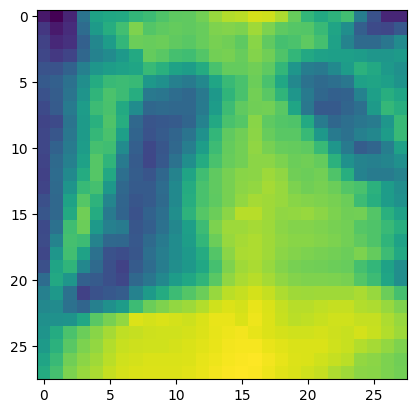

In [ ]:
# Displays a random image from training dataset.
index = random.randint(0, len(train_x))
print(f"{index}: {labels[train_y[index][0]]}")
plt.imshow(train_x[random.randint(0, len(train_x))])

## Data Processing
In this section we are using 'ImageDataGenerator' class from the keras deep learning library. this class is used to generate augmented images as they are loaded from a directory.

In [ ]:
# Defines the data generator that will be used to augment the images as they are loaded.
data_generator = ImageDataGenerator(featurewise_center=True,
                                    featurewise_std_normalization=True,
                                    horizontal_flip=True, 
                                    vertical_flip=True)

Here we will prepare the data generator for training and validation by fitting it to the combined dataset of training and validation data 

In [ ]:
train_x = np.expand_dims(train_x, axis=-1)
val_x = np.expand_dims(val_x, axis=-1)


In [ ]:
data_generator.fit(np.append(train_x, val_x, 0))

## Model Definition
It defines the CNN model for image classification. We will create the input layer with the same size as in the data set.

Next we are creating 2 convolutional layer with 32 filters and 3X3 kernal , we are using 'relu' activation function size and then pass through maximum pooling layer with the pool size 2X2.


We are using 'flatten()' to get one-dimensional array.

Then we will define fully connected output layer with the number of output nodes equal to the number of classes in the dataset.

Dense Layer
1. First dense layer has 512 unite with 'relu activation' and a dropout layer with rate of 0.5 to prevent overfitting.
2. Second dense layer has 256 unite with 'relu activation' and a dropout layer with rate of 0.3 to prevent overfitting.

Here we will use 'sigmoid' activation code which is used for binary classification problems.

'summary()'-> It is used to print the summary of the model.



In [ ]:
from tensorflow.keras import regularizers
# Define the input layer of the model with the size of an image.
input = layers.Input(shape=train_x[0].shape)

# Defines the first convolutional layer with max pooling.
conv_1 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(input)
pool_1 = layers.MaxPool2D(pool_size=(2, 2))(conv_1)

# Defines the second convolutional layer with max pooling.
conv_2 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(pool_1)
pool_2 = layers.MaxPool2D(pool_size=(2, 2))(conv_2)

# Flattens the outputs of the convolutoonal layers into a one dimensional array.
flatten = layers.Flatten()(pool_2)

dense1= layers.Dense(units=512, activation="relu", kernel_regularizer=regularizers.l2(0.001))(flatten)
dropout1 = layers.Dropout(0.5)(dense1)

dense2= layers.Dense(units=256, activation="relu", kernel_regularizer=regularizers.l2(0.001))(dropout1)
dropout2 = layers.Dropout(0.3)(dense2)

# Defines the output layer of the model a number of output nodes equal to the number of classes.
output = layers.Dense(units=len(np.unique(train_y)), activation="sigmoid")(dropout2)

# Initilises the defined model and prints summary of the model.
model = Model(inputs=input, outputs=output, name="Model")
model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0     

## Model Training
This is where we define the training options and then train the model.

1. 'BATCH_SIZE'->It refers to the number of training examples used in each iteration of gradient descent.
2. 'NUM_EPOCHS'->number of time the entire dataset is iterated over during training.
3. 'LEARNING_RATE'->It controls the step size taken in the direction of the negative gradient during optimization.


In [ ]:
# Defines the parameters used during training.
BATCH_SIZE = 64
NUM_EPOCHS = 10
LEARNING_RATE = 0.001

1.'optimiser' is a variable which is used to define a instance of the stochastic gradient descent (SGD) optimizer with the learning rate which is specified as 'LEARNING_RATE'.

2.'model.compile()'-> It is used to compile the model

for loss we will use binary_crossentropy for binary class.

In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=LEARNING_RATE)

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])


This code is used to data generator to feed the taining and validation data to the model batches.

We are also using the function 'fit()' which is used to train the model on the data by specifying the number of epochs and other parameters.

In [ ]:
# We use the data generator to pass the training and validation data to the model to train it.
history = model.fit(data_generator.flow(train_x, to_categorical(train_y), batch_size=BATCH_SIZE), 
                    steps_per_epoch=len(train_x) / BATCH_SIZE,
                    validation_data=data_generator.flow(val_x, to_categorical(val_y), batch_size=BATCH_SIZE),
                    validation_steps=len(val_x) / BATCH_SIZE,
                    epochs=NUM_EPOCHS)

Epoch 1/10
73/73 [==============================] - 6s 63ms/step - loss: 0.8185 - accuracy: 0.8764 - val_loss: 0.4635 - val_accuracy: 0.9485
Epoch 2/10
73/73 [==============================] - 6s 77ms/step - loss: 0.4024 - accuracy: 0.9348 - val_loss: 0.3050 - val_accuracy: 0.9561
Epoch 3/10
73/73 [==============================] - 4s 59ms/step - loss: 0.3039 - accuracy: 0.9427 - val_loss: 0.2464 - val_accuracy: 0.9637
Epoch 4/10
73/73 [==============================] - 5s 72ms/step - loss: 0.2524 - accuracy: 0.9484 - val_loss: 0.2190 - val_accuracy: 0.9561
Epoch 5/10
73/73 [==============================] - 7s 89ms/step - loss: 0.2230 - accuracy: 0.9535 - val_loss: 0.2065 - val_accuracy: 0.9523
Epoch 6/10
73/73 [==============================] - 5s 72ms/step - loss: 0.2126 - accuracy: 0.9503 - val_loss: 0.1771 - val_accuracy: 0.9599
Epoch 7/10
73/73 [==============================] - 6s 77ms/step - loss: 0.1936 - accuracy: 0.9522 - val_loss: 0.1776 - val_accuracy: 0.9561
Epoch 8/10
73

## Plot Learning Curves
In this section it uses 'matplotlib' library to plot the training and validation accuracy over the number of epochs.

This code will also usefull for visualizing the performance of the model. It helps to identify issues such as overfitting or underfitting.
1. We will see Accuracy vs Epoch.


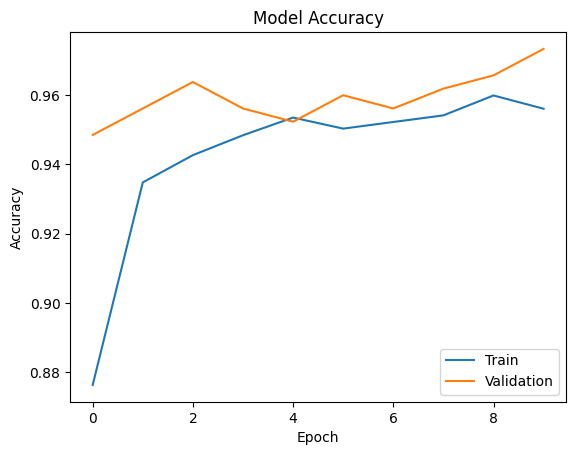

In [ ]:
# Plots the training and validation accuracy over the number of epochs.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

2. We will see Loss vs Epoch.

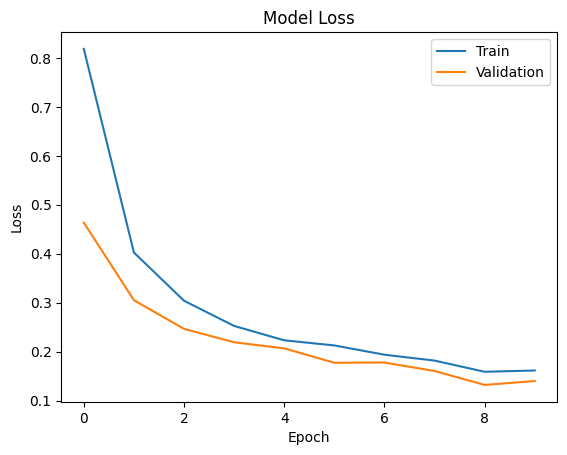

In [ ]:
# Plots the training and validation loss over the number of epochs.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

This code helps to evaluate the performance of the machine learning model on unseen data, by comparing the prediction values to the actual labels, we are calculating accuracy and test loose.

In [ ]:
y_pred = model.predict(test_x)

20/20 [==============================] - 0s 9ms/step


In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate of data ")
results = model.evaluate(test_x, y_pred, batch_size=128)
print("Test loss, Test accuracy:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for Three samples")
predictions = model.predict(test_x[0:3])
print("Predictions Shape:", predictions.shape)

Evaluate of data 
5/5 [==============================] - 0s 32ms/step - loss: 0.0441 - accuracy: 1.0000
Test loss, Test accuracy: [0.044073738157749176, 1.0]
Generate predictions for Three samples
1/1 [==============================] - 0s 42ms/step
Predictions Shape: (3, 2)
